<a href="https://colab.research.google.com/github/YarickVodila/Neural_network/blob/master/Neural_Network_Fashion_MNST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [6]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'SHirt', 'Sneaker', 'Bag', 'Ankle boot']

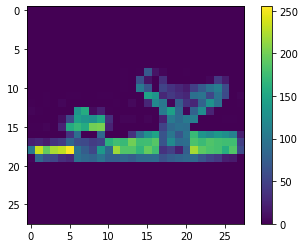

In [11]:
plt.figure() 
plt.imshow(x_train[59999]) #60000 рисунков 
plt.colorbar()
plt.grid(False)

Нормализация данных

In [12]:
x_train = x_train/255 #Делим интенсивность пикселей на 255
x_test = x_test/255

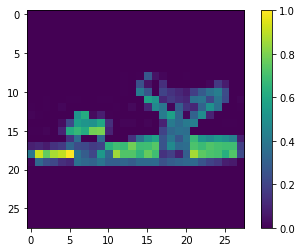

In [13]:
plt.figure() #теперь интенсивность пикселей от 0 до 1
plt.imshow(x_train[59999]) #60000 рисунков 
plt.colorbar()
plt.grid(False)

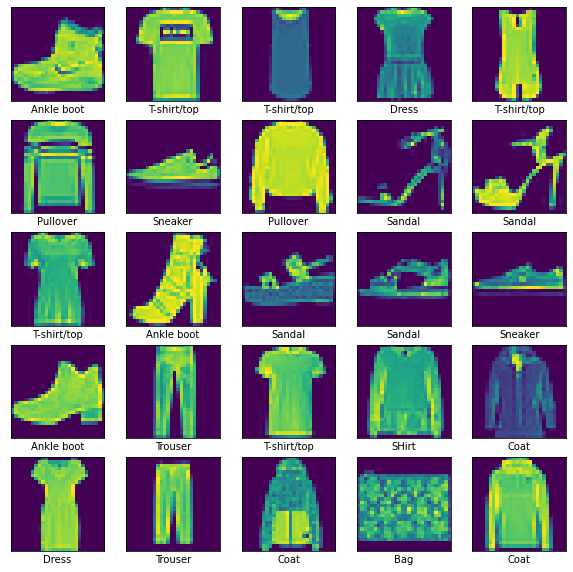

In [18]:
#Посмотрим несколько изображений
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i]) #cmap=plt.cm.binary делает рисунки чёрно белыми
  plt.xlabel(class_names[y_train[i]])

In [19]:
#Создаём нейронную сеть
model = keras.Sequential([
                     keras.layers.Flatten(input_shape=(28,28)),
                     keras.layers.Dense(128, activation='relu'), #128 это нейроны
                     keras.layers.Dense(10, activation='softmax'),
])

In [26]:
#Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy',metrics= ['accuracy'])
#Используем SGD -стахостический градиентный спуск
#Функция ошибки - категориальная перекрёстная энтропия
#accuracy - параметр качества

In [27]:
model.summary() #Печатаем параметры моделиЬИ

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Обучение
model.fit(x_train,y_train, epochs=10) #1 эпоха это когда весь набор проходит через сеть


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7238 - accuracy: 0.7670
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5113 - accuracy: 0.8256
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4676 - accuracy: 0.8399
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4266 - accuracy: 0.8526
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8583
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4019 - accuracy: 0.8601
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8640
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3824 - accuracy: 0.8671
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.374

In [29]:
#Проверка точности на тестовой выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy :', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4215 - accuracy: 0.8492
Test accuracy : 0.8492000102996826


In [36]:
#Предсказываем рисунки на обучающей выборке
prediction = model.predict(x_train)
prediction[0] #Рисунок 0, можно менять до 60000

array([4.7137078e-08, 3.2276952e-09, 3.2302930e-10, 6.7753797e-10,
       2.7702296e-10, 1.8601264e-04, 2.5241009e-08, 5.0236925e-04,
       4.6923278e-06, 9.9930692e-01], dtype=float32)

In [37]:
#соответственно этот рисунок соответствует последнему классу (9.9930692e-01) 
np.argmax(prediction[0]) #это выявляет максимальное число

9

In [35]:
y_train[0]

9

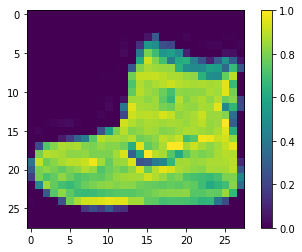

In [40]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [41]:
class_names[np.argmax(prediction[0])]

'Ankle boot'